# NLP Automatic Ticket Assignment Project


# Step 1 : Importing Dependencies

In [1]:
# !pip install chart_studio
# !pip install wordcloud
# !pip install ftfy

# Standard Library
import pandas as pd
import numpy as np


from ftfy import *

from utils.visualization import *
from utils.datapreprocessing import *

import missingno as msno
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 

# Step 2. Importing Data and performing basic EDA

In [2]:
filename= "dataset/input_data.xlsx"
df = pd.read_excel(filename, lines=True)

In [3]:
df.head(5)

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [4]:
df.count()

Short description    8492
Description          8499
Caller               8500
Assignment group     8500
dtype: int64

In [5]:
# Convert datatype to string
# df = df.applymap(str)
# df.count()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


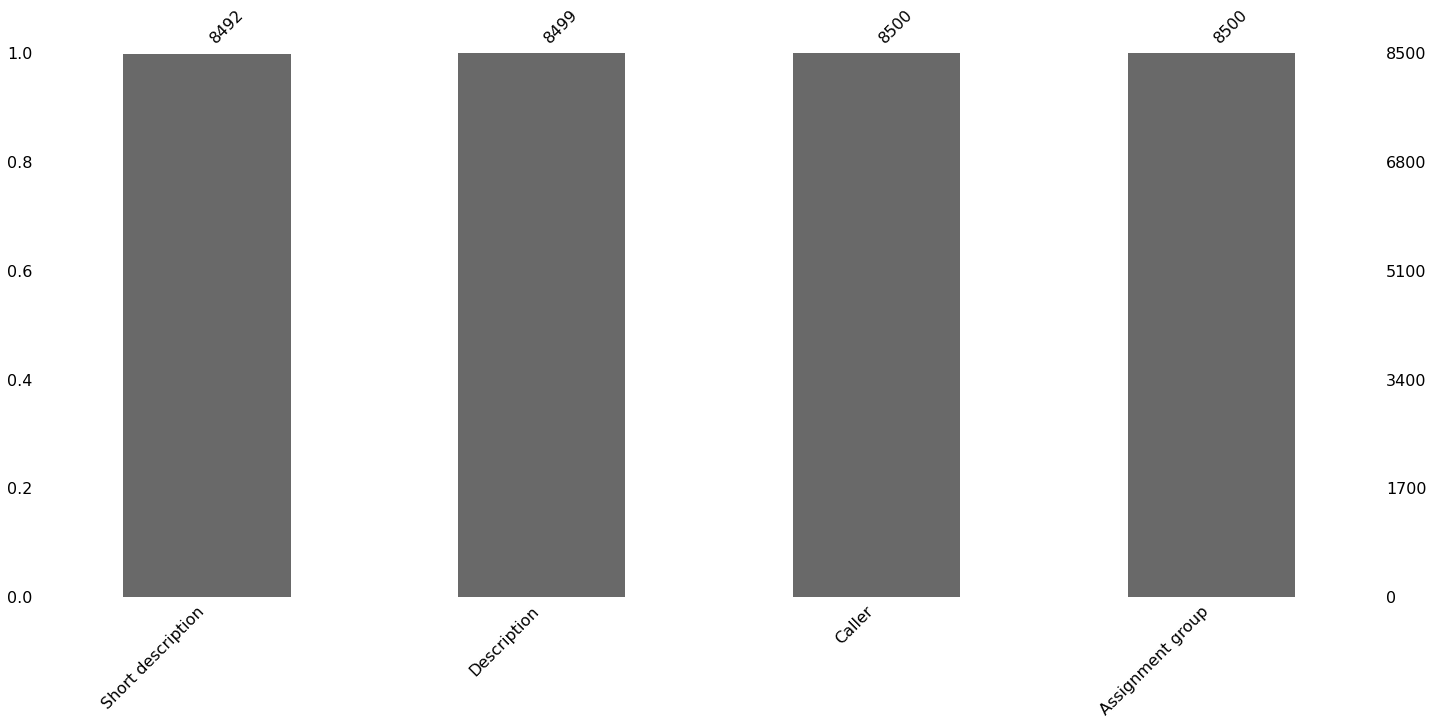

In [7]:
msno.bar(df)

## NOTE : There are 8 NaN Values in 'Short description' Feature, and 1 NaN value in 'Description' Feature.

In [8]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_64       1
GRP_35       1
GRP_73       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

## NOTE : There are 74 Dependent/Target classes which are required to be predicted by our Model

# Step 3 : Finding and Treating Missing Values

## 3(a). Finding NaN Values in 'Short Description' and 'Description'

In [9]:
# For Short Description
df[df['Short description'].isnull()][['Short description', 'Description']]

Short description                                        Description
2604               NaN  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...
3383               NaN  \r\n-connected to the user system using teamvi...
3906               NaN  -user unable  tologin to vpn.\r\n-connected to...
3910               NaN  -user unable  tologin to vpn.\r\n-connected to...
3915               NaN  -user unable  tologin to vpn.\r\n-connected to...
3921               NaN  -user unable  tologin to vpn.\r\n-connected to...
3924               NaN  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...
4341               NaN  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...

In [10]:
# For Description
df[df['Description'].isnull()][['Short description', 'Description']]

Short description Description
4395  i am locked out of skype         NaN

In [11]:
#nan_df = df[df['Short description'].isnull()].head()
#for row in nan_df.index: 
#    print(row, end = " ")

### Corresponding 'Description values' for NaN 'Short description' rows

In [12]:
for ind in [2604, 3383, 3906, 3910, 3915, 3921, 3924, 4341]:
    print("---"*3, "Row Id ", ind, "---"*3)
    print(df.iloc[ind, 1], "\n")

--------- Row Id  2604 ---------


received from: ohdrnswl.rezuibdt@gmail.com

hi,



link is not working. kindly resolve yhe issue on urgent basis.



best  

--------- Row Id  3383 ---------

-connected to the user system using teamviewer.
-help the user login to the portal.
-issue resolved. 

--------- Row Id  3906 ---------
-user unable  tologin to vpn.
-connected to the user system using teamviewer.
-help the user login to the company vpn using the vpn company vpn link.
-issue resolved. 

--------- Row Id  3910 ---------
-user unable  tologin to vpn.
-connected to the user system using teamviewer.
-help the user login to the company vpn using the vpn company vpn link.
-issue resolved. 

--------- Row Id  3915 ---------
-user unable  tologin to vpn.
-connected to the user system using teamviewer.
-help the user login to the company vpn using the vpn company vpn link.
-issue resolved. 

--------- Row Id  3921 ---------
-user unable  tologin to vpn.
-connected to the user system usin

### Corresponding 'Short description values' for NaN 'Description' rows

In [13]:
print("---"*3, "Row Id 4395", "---"*3)
print(df.iloc[4395, 0], "\n")

--------- Row Id 4395 ---------
i am locked out of skype 



## 3(b). Replacing NaN Values in 'Short Description' and 'Description' with simillar values from other rows

In [14]:
# Imputing NaN values in 'Short description' based upon corresponding 'Description' values from other simillar rows in df
df.at[2604, 'Short description'] = 'link not working'
df.at[3383, 'Short description'] = 'login issue'
df.at[3906, 'Short description'] = 'vpn login issue'
df.at[3910, 'Short description'] = 'vpn login issue'
df.at[3915, 'Short description'] = 'vpn login issue'
df.at[3921, 'Short description'] = 'vpn login issue'
df.at[3924, 'Short description'] = 'vpn login issue'
df.at[4341, 'Short description'] = 'login failure erp'

# Imputing NaN values in 'Description' based upon corresponding 'Description' values from other simillar rows in df
df.at[4395, 'Description'] = 'i am locked out of skype'

print("Succesfully replaced all NaN values in NaN Values in 'Short Description' and 'Description' feature.")

Succesfully replaced all NaN values in NaN Values in 'Short Description' and 'Description' feature.


In [15]:
df.count().T

Short description    8500
Description          8500
Caller               8500
Assignment group     8500
dtype: int64

## NOTE : we can verify that there are no more missing values in any of the features.

# Step 4: Feature Engineering
----------
### Creating an concatenated feature consisting of Short description and Description to pool all words in a single object

In [16]:
# Concatenate Short description and Description
df['Complete_Description'] = df['Description'] + " " + df['Short description']
df.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group                               Complete_Description  
0            GRP_0  -verified user details.(employee# & manager na...  
1            GRP_0  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  
2            GRP_0  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  
3            GRP_0  unable to access hr_tool page unable to access...  
4            GRP_0                          skype error  skype error   
5            GRP_0  unable to log in to engineering tool and skype...  
6            GRP_1  event: critical:HostName_221.company.com the v...  
7            GRP_0  ticket_no1550391- employment status - new non-...  
8            GRP_0  unable to disable add ins on outlook unable to...  
9            GRP_0  ticket update on inplant_874773 ticket update ...

## Finally coverting the df values to str type

In [17]:
# We will use applymap() as it works element-wise on a DataFrame, whereas apply() works on a row / column basis of a DataFrame
df = df.applymap(str)

# Step 5 : Data Cleaning : Fixing Garbled Text/ Mojibake/Replacing Contractions and Lemmitization
------------------
### The most interesting kind of brokenness that ftfy will fix is when someone has encoded Unicode with one standard and decoded it with a different one. This often shows up as characters that turn into nonsense sequences (called “mojibake”)

## 5(a). Garbled Text/ Mojibake

In [18]:

# Before cleaning Garbled Text/Mojibakes with ftfy
df['Complete_Description'][164]

'\n\nreceived from: abcdri@company.com\n\nwindy shi å°†æ’¤å›žé‚®ä»¶"ticket_no1564867 -- comments added"ã€‚\n\n\næœ¬è®¯æ\x81¯ä»…ä¾›æŒ‡å®šçš„æŽ¥æ”¶äººä½¿ç”¨ï¼Œå…¶ä¸\xadå\x8f¯èƒ½åŒ…å\x90«é€‚ç”¨æ³•å¾‹é¡¹ä¸‹ç‰¹è®¸çš„ã€\x81ä¿\x9då¯†çš„å’Œç¦\x81æ\xad¢æŠ«éœ²çš„å†…å®¹ã€‚é™¤æŒ‡å®šçš„æŽ¥æ”¶äººå¤–ï¼Œä¸¥ç¦\x81å…¶ä»–ä»»ä½•äººä¼\xa0æ’\xadã€\x81åˆ†å\x8f‘æˆ–å¤\x8dåˆ¶æœ¬è®¯æ\x81¯ã€‚å¦‚æžœæ‚¨è¯¯æ”¶åˆ°æœ¬è®¯æ\x81¯ï¼Œè¯·é€šçŸ¥å\x8f‘ä»¶äººå¹¶å°†è®¯æ\x81¯åˆ\xa0é™¤ã€‚\n[\nselect the following link to view the disclaimer in an alternate language.  æ’¤å›ž: ticket_no1564867 -- comments added'

In [19]:
### Applying ftfy.fix_text 
df['Short description'] = df['Short description'].apply(fix_text)
df['Description'] = df['Description'].apply(fix_text)
df['Complete_Description'] = df['Complete_Description'].apply(fix_text)

## 5(b). Replacing Contractions and Lemmitization

In [28]:
# df[['Short description', 'Description', 'Complete_Description']] = df[['Short description', 'Description', 'Complete_Description']].apply(clean_text)

In [21]:
for short_des in df['Short description']:
    short_des = clean_text(short_des)
print("'Short description' cleaning is complete.")

'Short description' cleaning is complete.


In [24]:
for des in df['Description']:
    des = clean_text(des)
print("'Description' Cleaning is complete.")


'Description' Cleaning is complete.


In [26]:
for com_des in df['Complete_Description']:
    com_des = clean_text(com_des)
print("'Complete Description' Cleaning is complete.")

'Complete Description' Cleaning is complete.


In [ ]:
# Clean dataset cloumn Complete_Description

#cleanDataset(df, 'Short description', getRegexList())
#cleanDataset(df, 'Description', getRegexList())
#cleanDataset(df, 'Complete_Description', getRegexList())

# Performing a Regex_clean is causing many data to be dropped. HTML Characters/ Non standard syntax and vocabulary characters or words Later

### Checking Data after ftfy/Contraction replacement and Lemmitization

In [27]:
# After cleaning Garbled Text/Mojibakes with ftfy.fix_text
df['Complete_Description'][164]

'\n\nreceived from: abcdri@company.com\n\nwindy shi 将撤回邮件"ticket_no1564867 -- comments added"。\n\n\n本讯息仅供指定的接收人使用,其中可能包含适用法律项下特许的、保密的和禁止披露的内容。除指定的接收人外,严禁其他任何人传播、分发或复制本讯息。如果您误收到本讯息,请通知发件人并将讯息删除。\n[\nselect the following link to view the disclaimer in an alternate language.  撤回: ticket_no1564867 -- comments added'

## NOTE : We can see that apart from English there are many non-english data points. The objective of the next step is to treat the non English language objects in df.

## NOTE : We can see many non english noise in data, but we will do a second stage text filtering after translation is done, because many of the non english data will be dropped after being mistakened as noise. 

## Visualization

#### Word Cloud of "Short descrition" Column

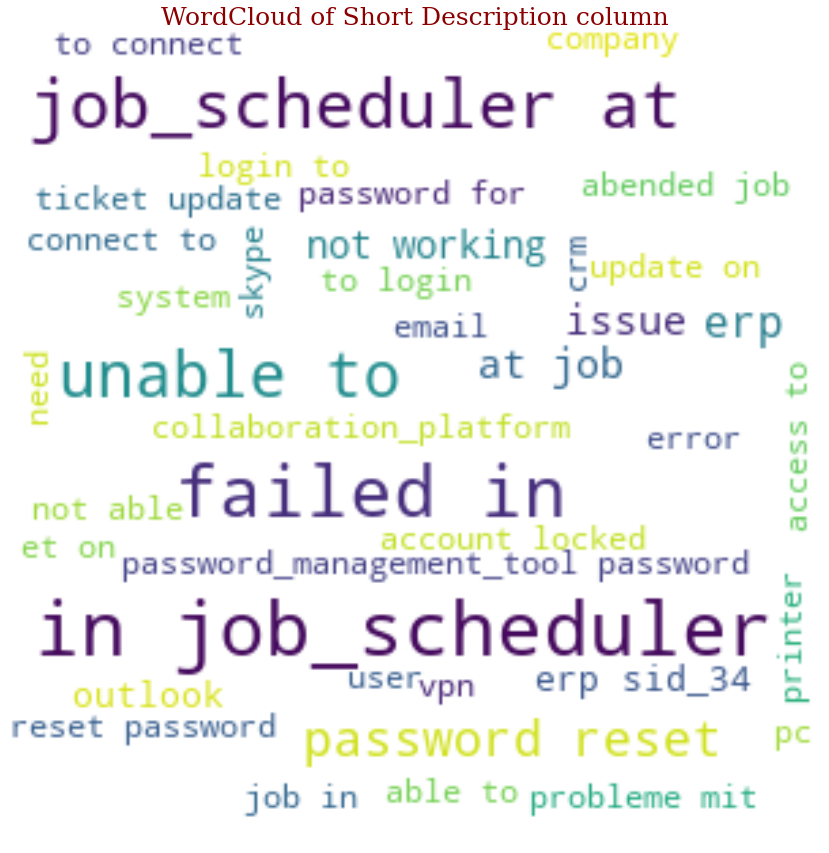

In [10]:
word_cloud_visulization(df['Short description'], "Short Description", stopword=True)

#### Word Cloud of "Description" Column

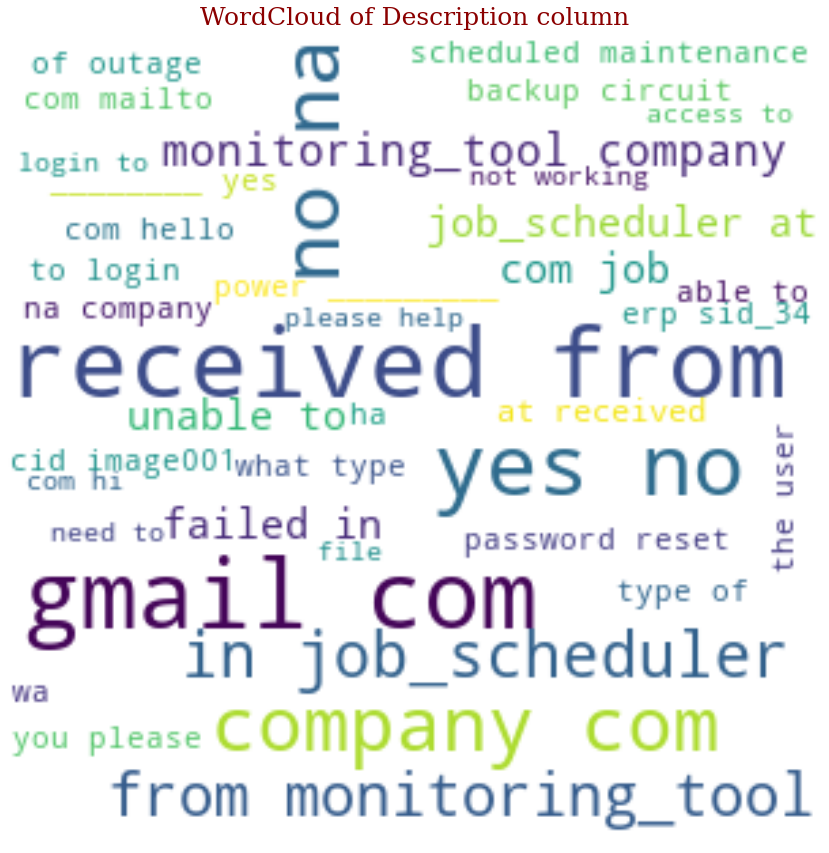

In [11]:
word_cloud_visulization(df['Description'], "Description", stopword=True)

#### Word Cloud of "Complete Description" Column

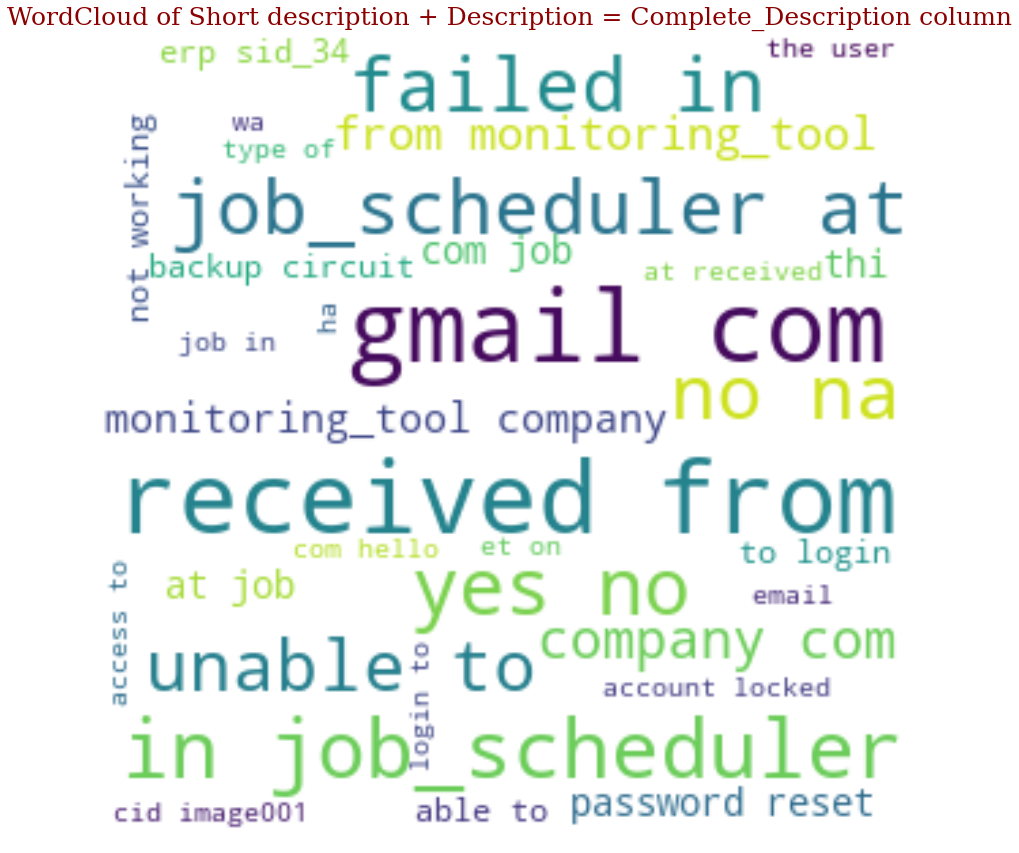

In [12]:
# Concatenate Short description + Description = Complete_Description
word_cloud_visulization(df['Complete_Description'], "Short description + Description = Complete_Description", stopword=True)

#### Word Cloud of "Caller" Column

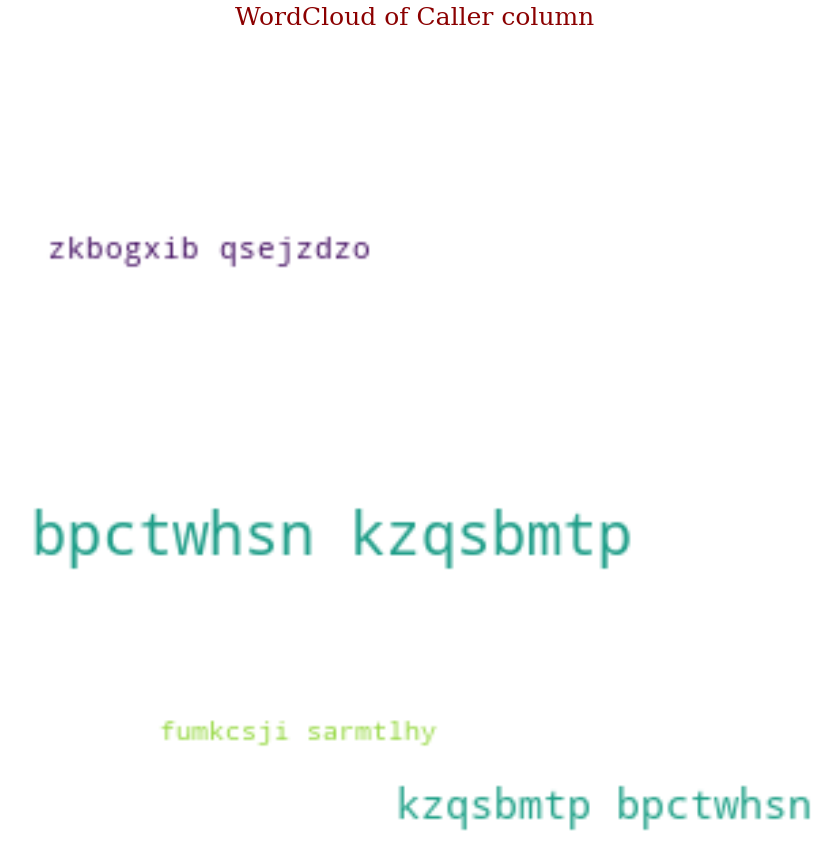

In [13]:
word_cloud_visulization(df['Caller'], "Caller", stopword=True)

## Datapreprocessing

In [14]:
# clean the dataset from Mojibakes using ftfy
df['Complete_Description'][164]

'\n\nreceived from: abcdri@company.com\n\nwindy shi å°†æ’¤å›žé‚®ä»¶"ticket_no1564867 -- comments added"ã€‚\n\n\næœ¬è®¯æ\x81¯ä»…ä¾›æŒ‡å®šçš„æŽ¥æ”¶äººä½¿ç”¨ï¼Œå…¶ä¸\xadå\x8f¯èƒ½åŒ…å\x90«é€‚ç”¨æ³•å¾‹é¡¹ä¸‹ç‰¹è®¸çš„ã€\x81ä¿\x9då¯†çš„å’Œç¦\x81æ\xad¢æŠ«éœ²çš„å†…å®¹ã€‚é™¤æŒ‡å®šçš„æŽ¥æ”¶äººå¤–ï¼Œä¸¥ç¦\x81å…¶ä»–ä»»ä½•äººä¼\xa0æ’\xadã€\x81åˆ†å\x8f‘æˆ–å¤\x8dåˆ¶æœ¬è®¯æ\x81¯ã€‚å¦‚æžœæ‚¨è¯¯æ”¶åˆ°æœ¬è®¯æ\x81¯ï¼Œè¯·é€šçŸ¥å\x8f‘ä»¶äººå¹¶å°†è®¯æ\x81¯åˆ\xa0é™¤ã€‚\n[\nselect the following link to view the disclaimer in an alternate language.  æ’¤å›ž: ticket_no1564867 -- comments added'

In [15]:
df['Short description'] = df['Short description'].apply(fix_text)
df['Description'] = df['Description'].apply(fix_text)
df['Complete_Description'] = df['Complete_Description'].apply(fix_text)

In [16]:
df['Complete_Description'][164]

'\n\nreceived from: abcdri@company.com\n\nwindy shi 将撤回邮件"ticket_no1564867 -- comments added"。\n\n\n本讯息仅供指定的接收人使用,其中可能包含适用法律项下特许的、保密的和禁止披露的内容。除指定的接收人外,严禁其他任何人传播、分发或复制本讯息。如果您误收到本讯息,请通知发件人并将讯息删除。\n[\nselect the following link to view the disclaimer in an alternate language.  撤回: ticket_no1564867 -- comments added'

In [17]:
# Clean dataset cloumn Complete_Description

cleanDataset(df, 'Complete_Description', getRegexList())

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2     \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  \n\nreceived from: avglmrts.vhqmtiua@gmail.com...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group                               Complete_Description  
0               GRP_0   verified user details employee  manager name ...  
1               GRP_0    from  hello team meetings skype meetings etc...  
2               GRP_0       from  cannot log to vpn best cant log to vpn  
3               GRP_0    unable access tool page unable access tool page  
4               GRP_0                           skype error skype error   
...               ...                                                ...  
8495           GRP_29    from  good afternoon not receiving the email...  
8496            GRP_0  telephony software issue telephony software issue  
8497            GRP_0  vip  windows password reset for tifpdchb pedxr...  
8498           GRP_62  i unable access the machine utilities finish t...  
8499           GRP_49  an mehreren lassen sich verschiedene prgramdnt...  

[8500 rows x 5 columns]

In [18]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               Complete_Description  
0            GRP_0   verified user details employee  manager name ...  
1            GRP_0    from  hello team meetings skype meetings etc...  
2            GRP_0       from  cannot log to vpn best cant log to vpn  
3            GRP_0    unable access tool page unable access tool page  
4            GRP_0                           skype error skype error

In [19]:
# Adding Word count and Description Length
df['review_len'] = df['Complete_Description'].astype(str).apply(len)
df['word_count'] = df['Complete_Description'].apply(lambda x: len(str(x).split()))

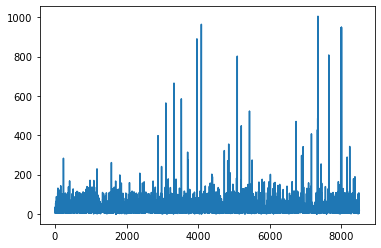

In [20]:
# Word Count Distribution for Description
df['word_count'].plot(
    x='word_count',
    y='count')

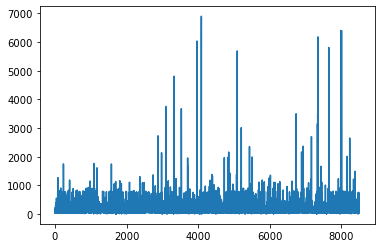

In [21]:
# Description Length Distribution
df['review_len'].plot(
    x='review length',
    y='count')

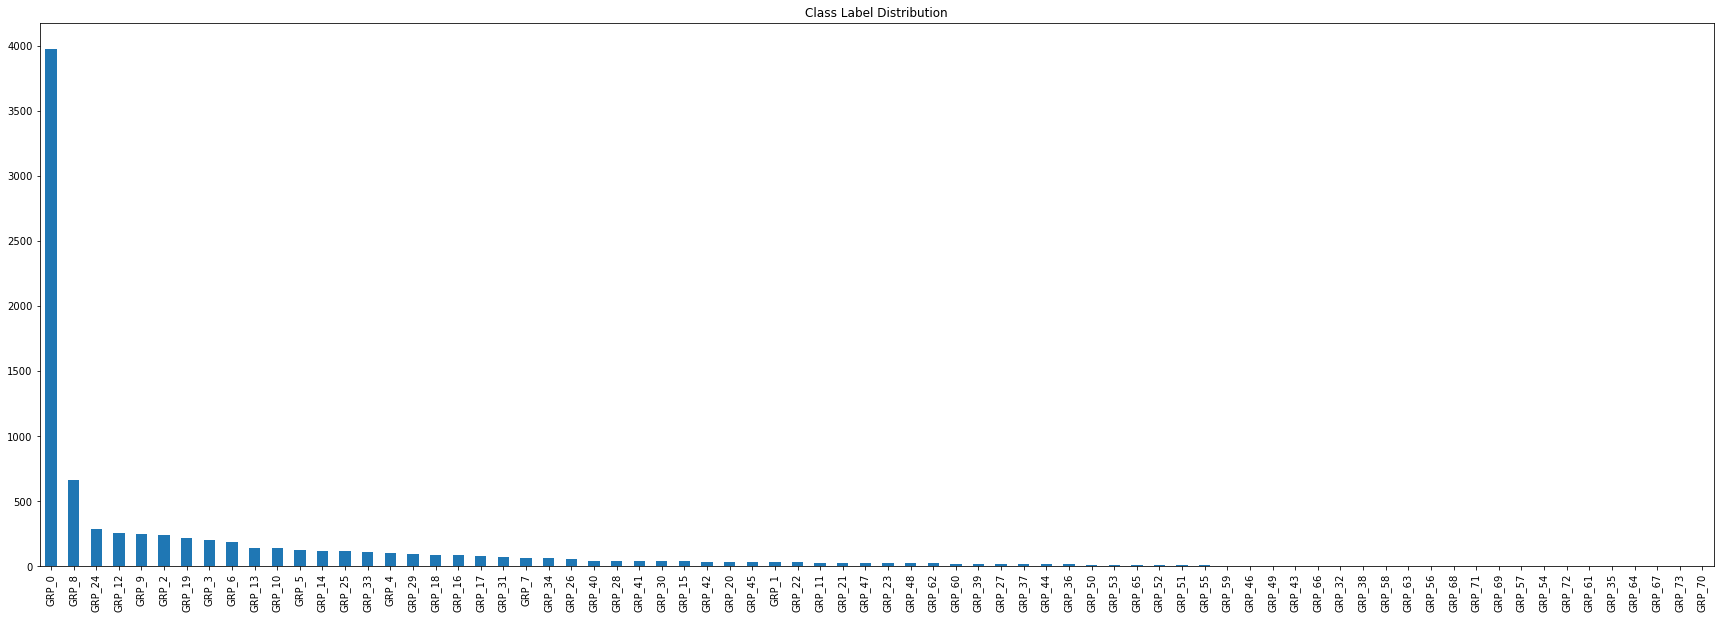

In [22]:
# Assignment group distribution
df['Assignment group'].value_counts().plot(kind='bar', figsize=(30,10), title='Class Label Distribution')

In [23]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               Complete_Description  \
0            GRP_0   verified user details employee  manager name ...   
1            GRP_0    from  hello team meetings skype meetings etc...   
2            GRP_0       from  cannot log to vpn best cant log to vpn   
3            GRP_0    unable access tool page unable access tool page   
4            GRP_0                           skype error skype error    

   review_len  word_count  
0         190          31  
1         141          22  
2          46          10  
3          47           8  
4          24           4

In [24]:
# The distribution of top unigrams before removing stop words for Complete_Description

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(df['Complete_Description'], 20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


the 7049
job 5060
from 3590
not 2946
and 2766
for 2655
password 2383
please 2183
erp 2096
yes 2027
scheduler 1928
tool 1762
failed 1735
company 1588
na 1575
sid 1552
reset 1530
this 1524
unable 1498
user 1478


In [25]:
# The distribution of top unigrams after removing stop words for Complete_Description

def get_top_n_words(corpus, range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['Complete_Description'], (1,1),20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


job 5060
password 2383
erp 2096
yes 2027
scheduler 1928
tool 1762
failed 1735
company 1588
na 1575
sid 1552
reset 1530
unable 1498
user 1478
access 1425
issue 1312
account 1211
ticket 1204
error 1025
hostname 971
outlook 948


In [26]:
# The distribution of top bigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df['Complete_Description'], (2,2),20)
for word, freq in common_words:
    print(word, freq)

job scheduler 1928
failed job 1614
yes na 1570
job job 1269
scheduler job 983
job failed 952
password reset 797
erp sid 602
backup circuit 441
engineering tool 427
account locked 400
collaboration platform 356
reset password 337
telecom vendor 323
password management 312
management tool 311
ticket update 300
abended job 300
type outage 286
scheduled maintenance 286


In [27]:
# The distribution of top trigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df['Complete_Description'], (3,3) ,20)
for word, freq in common_words:
    print(word, freq)

failed job scheduler 1614
job scheduler job 983
job job failed 950
job failed job 950
scheduler job job 480
password management tool 311
job job scheduler 300
abended job job 298
yes na company 285
backup circuit yes 285
yes yes na 231
erp sid account 213
management tool password 213
src inside dst 185
access group acl 185
group acl inside 185
circuit yes na 175
browser microsoft internet 168
microsoft internet explorer 168
internet explorer email 168



### Stopwords Removal & Lemmetization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer

In [29]:
# # Download Wordnet through NLTK in python console:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soumendra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soumendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Soumendra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

processed_all_documents = []
for row in df['Complete_Description']:
    word_tokens = word_tokenize(row)
#     print(word_tokens)

    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word = wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w))
        lemma_word.append(word)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)

In [31]:
df['Clean_Description'] = processed_all_documents

In [32]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               Complete_Description  \
0            GRP_0   verified user details employee  manager name ...   
1            GRP_0    from  hello team meetings skype meetings etc...   
2            GRP_0       from  cannot log to vpn best cant log to vpn   
3            GRP_0    unable access tool page unable access tool page   
4            GRP_0                           skype error skype error    

   review_len  word_count                                  Clean_Description  
0         190          31  verify user detail employee manager name check...  
1         141          22  hello team meeting skype meeting etc appear ou...  
2          46          10                          log vpn best cant log vpn  
3          47           8    unable access tool page unable access tool page  
4          24           4                            skype error skype error

In [33]:
# Adding Word count and Description Length
df['clean_review_len'] = df['Clean_Description'].astype(str).apply(len)
df['clean_word_count'] = df['Clean_Description'].apply(lambda x: len(str(x).split()))

In [34]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                               Complete_Description  \
0            GRP_0   verified user details employee  manager name ...   
1            GRP_0    from  hello team meetings skype meetings etc...   
2            GRP_0       from  cannot log to vpn best cant log to vpn   
3            GRP_0    unable access tool page unable access tool page   
4            GRP_0                           skype error skype error    

   review_len  word_count                                  Clean_Description  \
0         190          31  verify user detail employee manager name check...   
1         141          22  hello team meeting skype meeting etc appear ou...   
2          46          10                          log vpn best cant log vpn   
3          47           8    unable access tool page unable access tool page   
4          24           4                            skype error skype error   

   clean_review_len  clean_word_count  
0               152                24  
1               104                15  
2                25                 6  
3                47                 8  
4                23                 4

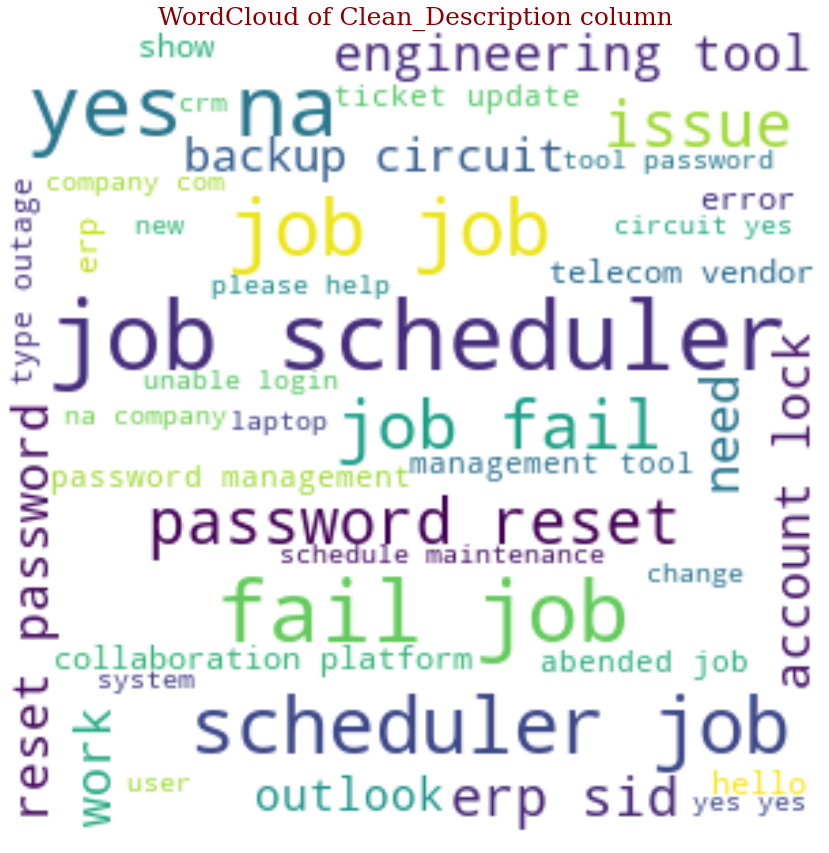

In [35]:
word_cloud_visulization(df['Clean_Description'], "Clean_Description", stopword=True)

### Label Encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Label Encoding Assignment group	

In [36]:
df['Assignment group'].unique() 

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [37]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Assignment group LabelEncode']= label_encoder.fit_transform(df['Assignment group']) 
  
df['Assignment group LabelEncode'].unique() 

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71])

In [38]:
df.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...  hmjdrvpb komuaywn   
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group                               Complete_Description  \
0            GRP_0   verified user details employee  manager name ...   
1            GRP_0    from  hello team meetings skype meetings etc...   
2            GRP_0       from  cannot log to vpn best cant log to vpn   
3            GRP_0    unable access tool page unable access tool page   
4            GRP_0                           skype error skype error    
5            GRP_0  unable log to engineering tool and skype unabl...   
6            GRP_1  event critical hostname  company com the value...   
7            GRP_0  ticket employment status  new non employee ent...   
8            GRP_0  unable disable add ins outlook unable disable ...   
9            GRP_0       ticket update inplant ticket update inplant    

   review_len  word_count                                  Clean_Description  \
0         190          31  verify user detail employee manager name check...   
1         141          22  hello team meeting skype meeting etc appear ou...   
2          46          10                          log vpn best cant log vpn   
3          47           8    unable access tool page unable access tool page   
4          24           4                            skype error skype error   
5          81          14  unable log engineering tool skype unable log e...   
6         211          31  event critical hostname company com value moun...   
7         118          18  ticket employment status new non employee ente...   
8          61          10  unable disable add in outlook unable disable a...   
9          44           6        ticket update inplant ticket update inplant   

   clean_review_len  clean_word_count  Assignment group LabelEncode  
0               152                24                             0  
1               104                15                             0  
2                25                 6                             0  
3                47                 8                             0  
4                23                 4                             0  
5                67                10                             0  
6               187                27                             1  
7               115                18                             0  
8                59                10                             0  
9                43                 6                             0

### Need of feature extraction techniques
Machine Learning algorithms learn from a pre-defined set of features from the training data to produce output for the test data. But the main problem in working with language processing is that machine learning algorithms cannot work on the raw text directly. So, we need some feature extraction techniques to convert text into a matrix(or vector) of features.
Some of the most popular methods of feature extraction are :

Bag-of-Words

TF-IDF

### Term Frequency-Inverse Document Frequency (TF-IDF)

“Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.”

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report


tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(df['Clean_Description']).toarray()


In [40]:
x_tfidf.shape

(8500, 12233)

In [41]:
x_tfidf[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
y = df['Assignment group LabelEncode']

In [43]:
y.shape

(8500,)

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x_tfidf, y, test_size=0.3)

### ML Classifier

 #### Support Vector Machine

In [45]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linear Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linear Score:  0.6552941176470588
SVM F1 Score:  0.6196041084456367


#### Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.5454901960784314
Naive Bayes F1 Score:  0.615569898130496


In [49]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 3)
clf.fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("KNN Classifiers Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("KNN Classifiers F1 Score: ", f_sc)


KNN Classifiers Score:  0.43098039215686273
KNN Classifiers F1 Score:  0.5236618828148879
